# House Price Prediction Project


---

## 1. Problem Definition


*   **Goal**: Predict the sales price for each house

## 2. Feature Selection

*  Choose features to train ML Model
*  Need to use `Feature Engineering` to identify Features needed

## 3. Spliting the datasets
### 3.1. dataset -> X, y
* `data`: dataset
* `X`: `data[features]`
* `y`: target variable `SalePrice`

### 3.2. `X and y` -> `X_train` `y_train` and `X_valid` `y_valid`
## 4. Training Machine Learning Model
---





## 1. Problem Definition

In [ ]:
# Import libraries
import pandas as pd
import numpy as np




*   Reading dataset



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab datasets/House Price Prediction/train.csv', index_col='Id')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
list(data.columns)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

## 2. Feature Selections

In [ ]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']


## 3. Splitting dataset into X and y

In [ ]:
X = data[features]
y = data['SalePrice']

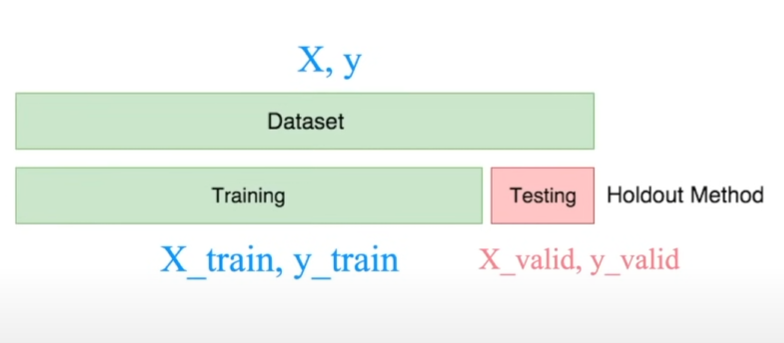

* X: `data[features]` sẽ được chia thành `X_train` và `y_train` để predicts `SalePrice`
* y: `data['SalePrice']` sẽ được chia thành `X_valid` và `y_valid` được dùng để compare với predictions của X với mục đích tìm ra độ chênh lệch

### Purpose: Tránh trường hợp bị overfitting: dữ liệu model train được quá hoàn hảo

`X and y` -> `X_train` `y_train` and `X_valid` `y_valid`

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### Test

In [ ]:
X_train.shape

(1168, 7)

In [ ]:
X.shape

(1460, 7)

In [ ]:
y_train.shape

(1168,)

In [ ]:
y.shape

(1460,)

In [ ]:
1168 / 1460

0.8

## 4. Training Machine Learning Model

### Using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#### Create DecisionTreeModel variable

In [ ]:
dt_model = DecisionTreeRegressor(random_state=1)

#### Fit training data into model

In [ ]:
# Fit training data into model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

#### Prediction

In [ ]:
y_predict = dt_model.predict(X_valid.head())

In [ ]:
y_predict

array([335000., 140200., 119000., 207500., 112000.])

#### Test prediction values

In [ ]:
pd.DataFrame({'y': y_valid.head(), 'y_predicts': y_predict})

,y,y_predicts
Id,,
530,200624,335000.0
492,133000,140200.0
460,110000,119000.0
280,192000,207500.0
656,88000,112000.0


### Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#### Create RandomForestModel variable

In [ ]:
rf_model = RandomForestRegressor(random_state=1)

#### Fit training data into model

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

#### Prediction

In [ ]:
rf_val_preds = rf_model.predict(X_valid)

In [ ]:
rf_val_preds[:5]

array([271690., 155039., 122024., 188915.,  91147.])

#### Predict with a new input

In [ ]:
X_valid.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
530,32668,1957,2515,0,3,4,9
492,9490,1941,958,620,1,3,5
460,7015,1950,979,224,1,3,5
280,10005,1977,1156,866,2,4,8
656,1680,1971,525,567,1,3,6


In [ ]:
rf_model.predict([[6969, 2021, 1000, 800, 4, 5, 8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([206158.4])

## 5. Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Predict on the test data
y_pred = rf_model.predict(X_train)

# Calculate evaluation metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}") #
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 8540.679001793867
Mean Squared Error (MSE): 180828925.97247007
Root Mean Squared Error (RMSE): 13447.264627888828
R-squared (R²): 0.9706301615635249
